In [60]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/loan_data_2007_2014.csv",engine='python')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df.shape

(466285, 75)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [63]:
#remove null variable
df = df.drop(['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m'],axis=1)
df.shape

(466285, 58)

In [64]:
#remove variabel yang tidak berkontribusi untuk regresi logistik
df = df.drop(['Unnamed: 0','id','member_id','emp_title','issue_d','url','desc','title','zip_code','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d'],axis=1)
df.shape

(466285, 45)

In [65]:
#Handling Missing Value
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(df.delinq_2yrs.mean())
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(df.inq_last_6mths.mean())
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df.mths_since_last_delinq.mean())
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(df.mths_since_last_record.mean())
df['open_acc'] = df['open_acc'].fillna(df.open_acc.mean())
df['pub_rec'] = df['pub_rec'].fillna(df.pub_rec.mean())
df['revol_util'] = df['revol_util'].fillna(df.revol_util.mean())
df['total_acc'] = df['total_acc'].fillna(df.total_acc.mean())
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(df.collections_12_mths_ex_med.mean())
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(df.acc_now_delinq.mean())
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(df.tot_coll_amt.mean())
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df.tot_cur_bal.mean())
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(df.total_rev_hi_lim.mean())
df['mths_since_last_major_derog'] = df['mths_since_last_major_derog'].fillna(df.mths_since_last_major_derog.mean())
df['annual_inc'] = df['annual_inc'].fillna(df.annual_inc.mean())
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

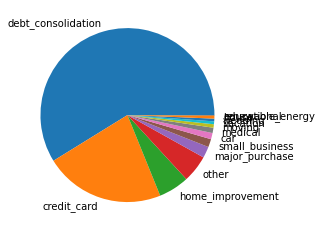

In [66]:
#eksplorasi profil peminjam kredit
#tujuan mengajukan pinjaman kredit
count_purpose = df.purpose.value_counts()
labels = ['debt_consolidation','credit_card','home_improvement','other','major_purchase','small_business','car','medical','moving','vacation','wedding','house','educational','renewable_energy']
import matplotlib.pyplot as plt
plt.pie(count_purpose, labels = labels)
plt.show()

In [67]:
df.purpose.value_counts()/len(df)*100

debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64

In [68]:
#kepemilikan rumah dari peminjam kredit
df.home_ownership.value_counts()/len(df)*100

MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64

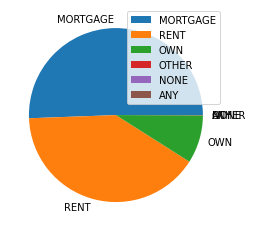

In [69]:
count_home_ownership = df.home_ownership.value_counts()
labels = ['MORTGAGE','RENT','OWN','OTHER','NONE','ANY']
import matplotlib.pyplot as plt
plt.pie(count_home_ownership, labels = labels)
plt.legend()
plt.show()

In [70]:
# explorasi variabel yang akan di prediksi
df.loan_status.value_counts()/len(df)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

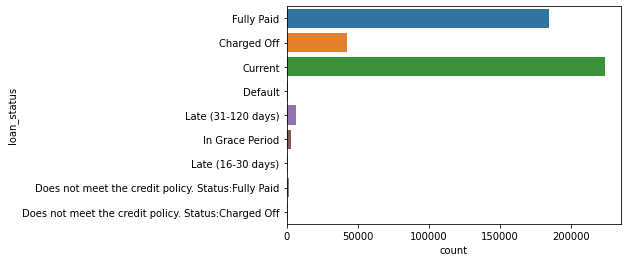

In [71]:
import seaborn as sns
sns.countplot(y="loan_status", data=df)

In [72]:
#remove status loan does not meet the credit policy
exceptions = ['Does not meet the credit policy. Status:Charged Off','Does not meet the credit policy. Status:Fully Paid']
df = df[df.loan_status.isin(exceptions) == False]

In [73]:
#mengubah loan status menjadi 2 kategori
#1 = good, 0 = bad
def convert(i):
  if (i == 'Current' or i == 'Fully Paid'):
    return 1
  else:
    return 0

In [74]:
df['status'] = df['loan_status'].apply(convert)
df['status'].value_counts()

1    408965
0     54571
Name: status, dtype: int64

In [75]:
#remove kolom loan status dengan 7 kategori
df = df.drop(['loan_status'],axis=1)

In [76]:
#sudah tidak ada nilai null dan terdapat kolom status loan 2 kategori
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463536 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    463536 non-null  int64  
 1   funded_amnt                  463536 non-null  int64  
 2   funded_amnt_inv              463536 non-null  float64
 3   term                         463536 non-null  object 
 4   int_rate                     463536 non-null  float64
 5   installment                  463536 non-null  float64
 6   grade                        463536 non-null  object 
 7   sub_grade                    463536 non-null  object 
 8   emp_length                   463536 non-null  object 
 9   home_ownership               463536 non-null  object 
 10  annual_inc                   463536 non-null  float64
 11  verification_status          463536 non-null  object 
 12  pymnt_plan                   463536 non-null  object 
 13 

In [77]:
#ubah kategorikal data
df = pd.get_dummies(df, columns=['term','grade','sub_grade','emp_length','home_ownership','verification_status',
                                 'pymnt_plan','purpose','addr_state','initial_list_status','application_type'])
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,34.10443,...,0,0,0,0,0,0,0,1,0,1
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,34.10443,...,0,0,0,0,0,0,0,1,0,1
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,34.10443,...,0,0,0,0,0,0,0,1,0,1
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.00000,...,0,0,0,0,0,0,0,1,0,1
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.00000,...,0,0,0,0,0,0,0,1,0,1


In [78]:
#Menentukan X yaitu variabel independen dan y variabel dependen
X = df.drop(['status'],axis=1)
y = df['status']

In [79]:
#standarisasi variabel X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [80]:
#Membagi data menjadi train dan test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [81]:
#Modelling
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [82]:
#Evaluasi Model
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[ 8402,  2432],
       [   77, 81797]])

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87     10834
           1       0.97      1.00      0.98     81874

    accuracy                           0.97     92708
   macro avg       0.98      0.89      0.93     92708
weighted avg       0.97      0.97      0.97     92708

